# Network Intrusion Detection using Decision Tree Classifier

#### Method Description:

**Step 1: Data Processing**

**Step 2: Data Transformation**

**Step 3: Feature Selection**

**Step 4: Build the model:**
Decision tree model is built

**Step 5: Prediction & Evaluation (validation):**
Using the test data to make predictions of the model. Multiple scores are considered such as:accuracy score, precision, recall, f-measure.

## Importing the required libraries

In [1]:
import numpy as np #linear algebra library
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #various plotting tools
import seaborn as sns
import sklearn
import itertools

## Importing and loading the dataset

In [2]:
df=pd.read_csv("KDDTrain+.txt",header=None)
test_df = pd.read_csv("KDDTest+.txt",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


# Data Processing

The dataset doesn't include column names, so let's add them.

In [5]:
# attaching the column names to the dataset
col_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells'
,'num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate'
,'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate'
,'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

df.columns = col_names
test_df.columns = col_names
# dimensions of the datase
df.drop('level', axis=1, inplace=True)
test_df.drop('level', axis=1, inplace=True)
print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',test_df.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


#### Sample View of the training dataset

In [6]:
print("Training data")
df.head()

Training data


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


#### Sample View of the testing dataset

In [7]:
print("Testing data")
test_df.head()

Testing data


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


Label distribution Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64


<AxesSubplot:ylabel='attack'>

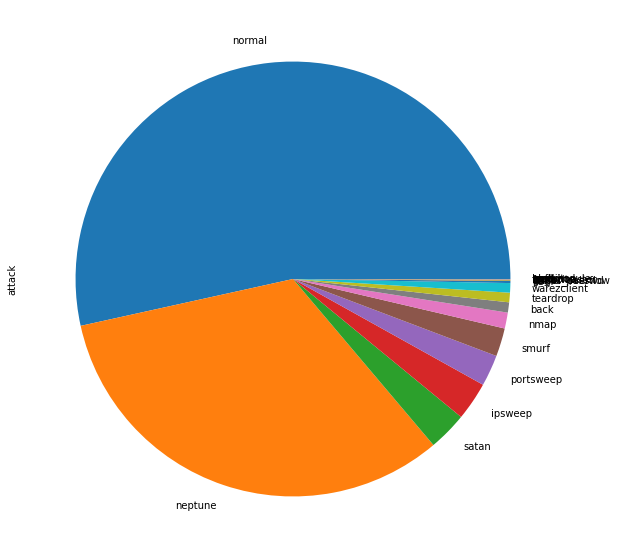

In [8]:
# Analysing the attack column
print('Label distribution Training set:')
print(df['attack'].value_counts())
df['attack'].value_counts().plot.pie(figsize=(10, 10))

Label distribution Test set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
loadmodule            2
udpstorm              2
sqlattack             2
phf                   2
perl                  2
worm                  2
imap                  1
Name: attack, dtype: int64


<AxesSubplot:ylabel='attack'>

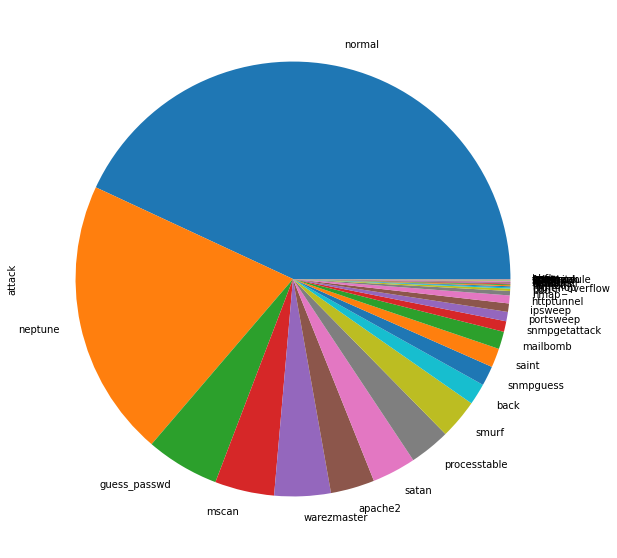

In [9]:
print('Label distribution Test set:')
print(test_df['attack'].value_counts())
test_df['attack'].value_counts().plot.pie(figsize=(10, 10))

## Data Transformations

The first transformation that I will do is around the attack field. I will start by adding a column that encodes 'normal' values as 0 and any other value as 1. We will use this as our classifier for a simple binary model that idenfities any attack.

In [10]:
# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0


<AxesSubplot:ylabel='attack_flag'>

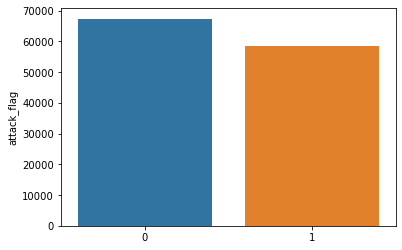

In [11]:
sns.barplot(x=df['attack_flag'].value_counts().index, y=df['attack_flag'].value_counts())

## Map attack field to attack class

**1) Denial of Service (DoS):** It is one of the most harmful attacks. These type of attacks restrict the user from using
certain services. The attacker tries to overload the system or keep the resources busy in the network and does not
allow the user to access services.

**2) Probing Attack (Probe):** This attack aims to analysing the network, gather information. This attack is generally performed to be able to attack through some other methods later.

**3) Remote to Local Attack (R2L):** In this attack, the attacker tries to gain access to a system by sending some message to the server and gaining access to system from a remote machine. The attacker makes some changes to the server to get access to resources.

**4) User to Root Attack (U2R):** In this kind of attack, the attacker tries to gain access to the system as a root user. A class of exploit in which the adversary starts out with access to a normal user account on the system (gained either by sniffing passwords, a dictionary attack, or social engineering) and is able to exploit some vulnerability to gain root access to the system. The attacker tries to gain access to all data of the system and have full control on the server.

### Next, I will classify each of the attacks according to attack type for a more granular prediction model.

**Denial of Service attacks (DoS):**
apache2
,back
,land
,neptune
,mailbomb
,pod
,processtable
,smurf
,teardrop
,udpstorm
,worm

**Probing Attack (Probe):**
ipsweep
,mscan
,nmap
,portsweep
,saint
,satan

**Remote to Local Attack (R2L):**
ftp_write
,guess_passwd
,http_tunnel
,imap
,multihop
,named
,phf
,sendmail
,snmpgetattack
,snmpguess
,spy
,warezclient
,warezmaster
,xclock
,xsnoop

**User to Root Attack (U2R):**
buffer_overflow
,loadmdoule
,perl
,ps
,rootkit
,sqlattack
,xterm

### Rename every attack label: 0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R and add a corressponding column

In [12]:
# lists to hold our attack classifications
DoS = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
Probe = ['ipsweep','mscan','nmap','portsweep','saint','satan']
R2L = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']
U2R = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','R2L','U2R']

# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in DoS:
        attack_type = 1
    elif attack in Probe:
        attack_type = 2
    elif attack in R2L:
        attack_type = 3
    elif attack in U2R:
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0
        
    return attack_type

# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_flag,attack_map
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0,0


<AxesSubplot:ylabel='attack_map'>

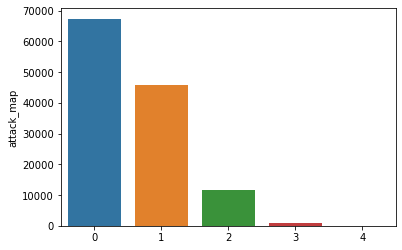

In [13]:
sns.barplot(x=df['attack_map'].value_counts().index, y=df['attack_map'].value_counts())

In [14]:
df.drop('attack', axis=1, inplace=True)
test_df.drop('attack', axis=1, inplace=True)
print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',test_df.shape)

Dimensions of the Training set: (125973, 43)
Dimensions of the Test set: (22544, 43)


# Feature engineering

One-Hot-Encoding (one-of-K) is used to to transform all categorical features into binary features. Requirement for One-Hot-encoding: "The input to this transformer should be a matrix of integers, denoting the values taken on by categorical (discrete) features. The output will be a sparse matrix where each column corresponds to one possible value of one feature."

Therefore the features first need to be transformed with LabelEncoder, to transform every category to a number.

In [15]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories

Distribution of categories in service:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


In [16]:
# Test set
print('Test set:')
for col_name in test_df.columns:
    if test_df[col_name].dtypes == 'object' :
        unique_cat = len(test_df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories


#### Conclusion: Need to make dummies for all categories as the distribution is fairly even. In total: 3+70+11=84 dummies.
Comparing the results shows that the Test set has fewer categories (6), these need to be added as empty columns.

### Let's take a look at some charts to see how things are distributed.

In [17]:
# helper function for drawing mulitple charts.
def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])
        
    return axs

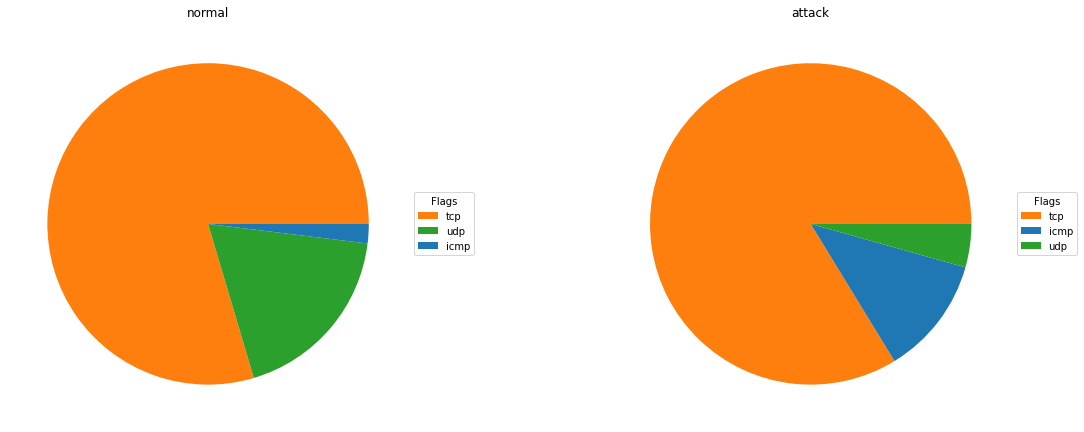

In [18]:
normal_flags = df.loc[df.attack_flag == 0].protocol_type.value_counts()
attack_flags = df.loc[df.attack_flag == 1].protocol_type.value_counts()

# create the charts
flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'])        
plt.show()

The thing to notice here is the difference in each protocol type. So my initial impression is that protocol may be useful in being able to identify the type of traffic we are observing.

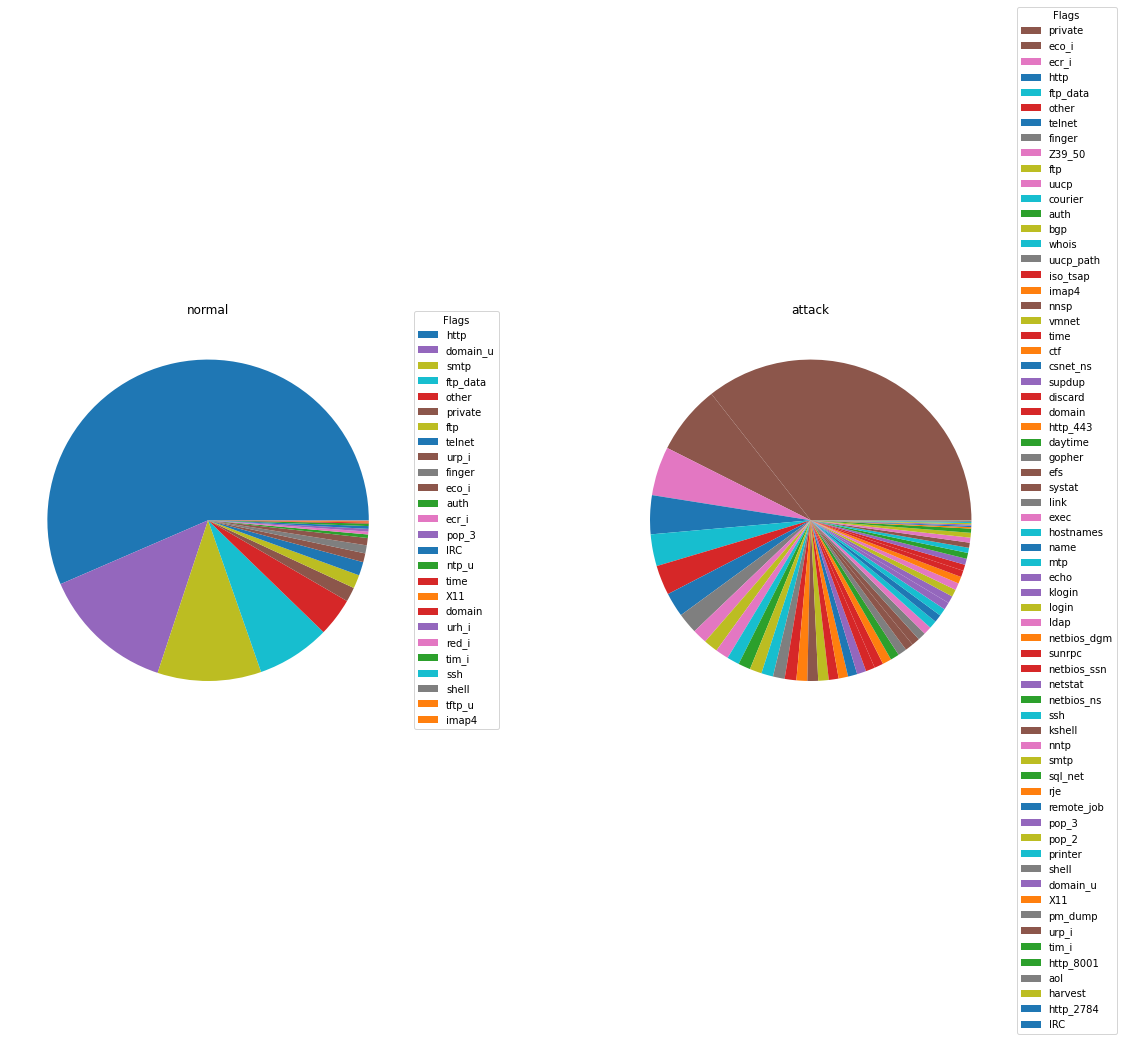

In [19]:
normal_flags = df.loc[df.attack_flag == 0].service.value_counts()
attack_flags = df.loc[df.attack_flag == 1].service.value_counts()

# create the charts
flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'])        
plt.show()

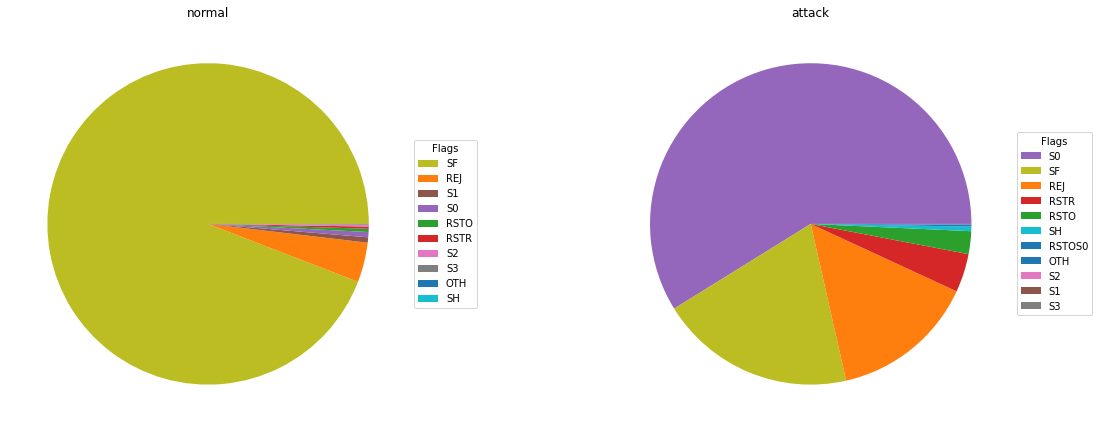

In [20]:
normal_flags = df.loc[df.attack_flag == 0].flag.value_counts()
attack_flags = df.loc[df.attack_flag == 1].flag.value_counts()

# create the charts
flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'])        
plt.show()

## LabelEncoder

### Insert categorical features into a 2D numpy array

In [21]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag'] 
 # Get the categorical values into a 2D numpy array
df_categorical_values = df[categorical_columns]
testdf_categorical_values = test_df[categorical_columns]
df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


#### Make column names for dummies

In [22]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)
print("Total number of columns to be added =",len(dumcols))

#do same for test set
unique_service_test=sorted(test_df.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

### Transform categorical features into numbers using LabelEncoder()

In [23]:
# train set
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


## One-Hot-Encoding

In [24]:
enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
print(df_cat_data.shape)
print(testdf_cat_data.shape)

(125973, 84)
(22544, 78)


#### Add 6 missing categories from train set to test set

In [26]:
trainservice=df['service'].tolist()
testservice= test_df['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_harvest',
 'service_urh_i',
 'service_red_i',
 'service_http_2784',
 'service_aol',
 'service_http_8001']

In [27]:
for col in difference:
    testdf_cat_data[col] = 0

testdf_cat_data.shape

(22544, 84)

#### Join encoded categorical dataframe with the non-categorical dataframe

In [28]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=test_df.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125973, 124)
(22544, 124)


In [29]:
newdf.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
copy_df=newdf.copy()
copy_df_test=newdf_test.copy()

# Binary Classification:

In [31]:
copy_df.drop('attack_map', axis=1, inplace=True)
copy_df_test.drop('attack_map', axis=1, inplace=True)

In [32]:
# Split dataframes into X & Y. Here X refers to the features and Y is the target label 
X_binary = copy_df.drop('attack_flag',1)
Y_binary = copy_df.attack_flag
# test set
X_binary_test = copy_df_test.drop('attack_flag',1)
Y_binary_test = copy_df_test.attack_flag

col=list(X_binary)
col_test=list(X_binary_test)

# Feature Selection

Feature selection refers to techniques that select a subset of the most relevant features (columns) for a dataset. Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. 

## Recursive Feature Elimination

RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features. This is in contrast to filter-based feature selections that score each feature and select those features with the largest (or smallest) score.

Technically, RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection internally.

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

In [33]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=15, step=1)

rfe.fit(X_binary, Y_binary)
X_rfe=rfe.transform(X_binary)
true=rfe.support_
rfecolindex=[i for i, x in enumerate(true) if x]
rfecolname=list(col[i] for i in rfecolindex)

print('Features selected:',rfecolname)
print(X_rfe.shape)

Features selected: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'service_ecr_i', 'service_ftp_data', 'service_http', 'service_private']
(125973, 15)


# Build the model:

### Classifier is trained for the above selected features

In [34]:
clf_rfe=DecisionTreeClassifier(random_state=0)
clf=clf_rfe.fit(X_rfe, Y_binary)

[Text(986.0682138715471, 1064.55, 'X[1] <= 28.5\ngini = 0.498\nsamples = 125973\nvalue = [67343, 58630]'),
 Text(668.8803503853934, 1019.25, 'X[13] <= 0.5\ngini = 0.149\nsamples = 58257\nvalue = [4717, 53540]'),
 Text(577.983915056501, 973.95, 'X[2] <= 3.5\ngini = 0.061\nsamples = 53918\nvalue = [1707, 52211]'),
 Text(471.5459551130022, 928.6500000000001, 'X[4] <= 0.5\ngini = 0.031\nsamples = 52843\nvalue = [837, 52006]'),
 Text(413.4278477260044, 883.35, 'X[5] <= 242.5\ngini = 0.019\nsamples = 52484\nvalue = [494, 51990]'),
 Text(312.1380615234375, 838.05, 'X[12] <= 0.5\ngini = 0.098\nsamples = 8005\nvalue = [413, 7592]'),
 Text(198.3029087611607, 792.75, 'X[5] <= 4.5\ngini = 0.077\nsamples = 7770\nvalue = [311, 7459]'),
 Text(94.34933035714285, 747.45, 'X[1] <= 7.5\ngini = 0.014\nsamples = 4151\nvalue = [30, 4121]'),
 Text(46.707589285714285, 702.1500000000001, 'X[9] <= 0.105\ngini = 0.444\nsamples = 66\nvalue = [22, 44]'),
 Text(24.910714285714285, 656.85, 'X[8] <= 0.8\ngini = 0.444

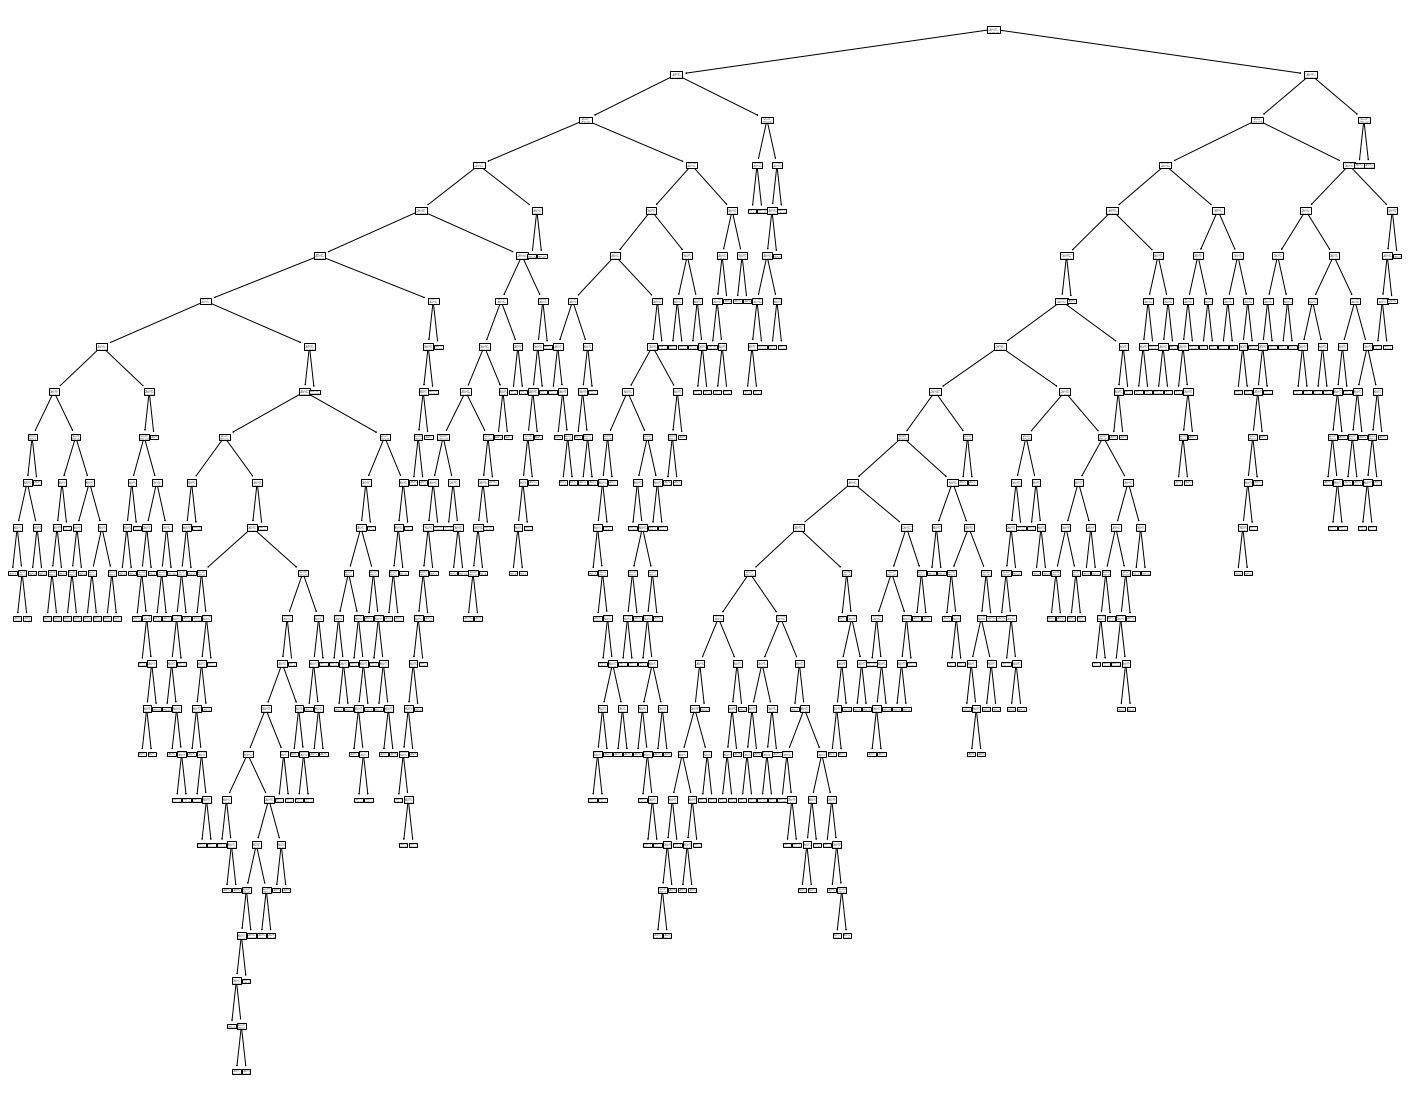

In [35]:
from sklearn import tree
#clf=clf_rfe.fit(X_rfe, Y_binary)
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)

In [36]:
# reduce test dataset to 15 features, use only features described in rfecolname.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_test=X_binary_test.iloc[:,rfecolindex]

In [37]:
Y_pred=clf_rfe.predict(X_test)
# accuracy
print("Accuracy:", accuracy_score(Y_binary_test,Y_pred))

Accuracy: 0.7869943222143364


In [38]:
cnf_matrix = confusion_matrix(Y_binary_test, Y_pred)
print("Confusion Matrix: \n")
print(cnf_matrix)

Confusion Matrix: 

[[9352  359]
 [4443 8390]]


Text(0.5, 15.0, 'Predicted label')

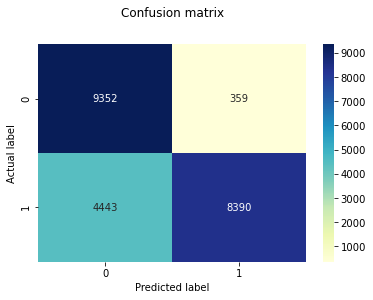

In [39]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [40]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_binary_test, Y_pred)
print("Accuracy: " ,accuracy)
precision = metrics.precision_score(Y_binary_test, Y_pred)
print("Precision: ",precision)
recall = metrics.recall_score(Y_binary_test, Y_pred)
print("Recall: ",recall)
f1 = metrics.f1_score(Y_binary_test, Y_pred)
print("F1-Score: ",f1)

Accuracy:  0.7869943222143364
Precision:  0.9589667390558921
Recall:  0.6537832151484454
F1-Score:  0.7774997683254564


In [41]:
print("\nClassification Report:")
print(classification_report(Y_binary_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.96      0.80      9711
           1       0.96      0.65      0.78     12833

    accuracy                           0.79     22544
   macro avg       0.82      0.81      0.79     22544
weighted avg       0.84      0.79      0.79     22544



# Mutli Class Classification:

## Split Dataset into 4 datasets for every attack category

In [50]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=newdf[~newdf['attack_map'].isin(to_drop_DoS)];
Probe_df=newdf[~newdf['attack_map'].isin(to_drop_Probe)];
R2L_df=newdf[~newdf['attack_map'].isin(to_drop_R2L)];
U2R_df=newdf[~newdf['attack_map'].isin(to_drop_U2R)];

#test
DoS_df_test=newdf_test[~newdf_test['attack_map'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[~newdf_test['attack_map'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[~newdf_test['attack_map'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[~newdf_test['attack_map'].isin(to_drop_U2R)];
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113279, 123)
Dimensions of Probe: (79008, 123)
Dimensions of R2L: (68347, 123)
Dimensions of U2R: (67395, 123)
Test:
Dimensions of DoS: (17315, 123)
Dimensions of Probe: (12276, 123)
Dimensions of R2L: (12598, 123)
Dimensions of U2R: (9920, 123)


In [51]:
# Split dataframes into X & Y
# assign X as a dataframe of feautures and Y as a series of outcome variables
X_DoS = DoS_df.drop('attack_map',1)
Y_DoS = DoS_df.attack_map
X_Probe = Probe_df.drop('attack_map',1)
Y_Probe = Probe_df.attack_map
X_R2L = R2L_df.drop('attack_map',1)
Y_R2L = R2L_df.attack_map
X_U2R = U2R_df.drop('attack_map',1)
Y_U2R = U2R_df.attack_map
# test set
X_DoS_test = DoS_df_test.drop('attack_map',1)
Y_DoS_test = DoS_df_test.attack_map
X_Probe_test = Probe_df_test.drop('attack_map',1)
Y_Probe_test = Probe_df_test.attack_map
X_R2L_test = R2L_df_test.drop('attack_map',1)
Y_R2L_test = R2L_df_test.attack_map
X_U2R_test = U2R_df_test.drop('attack_map',1)
Y_U2R_test = U2R_df_test.attack_map

In [52]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

## Feature Selection:

In [53]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=15, step=1)

rfe.fit(X_DoS, Y_DoS)
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [54]:
rfe.fit(X_Probe, Y_Probe)
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)

In [55]:
rfe.fit(X_R2L, Y_R2L)
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [56]:
rfe.fit(X_U2R, Y_U2R)
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

In [57]:
print('Features selected for DoS:',rfecolname_DoS)
print()
print('Features selected for Probe:',rfecolname_Probe)
print()
print('Features selected for R2L:',rfecolname_R2L)
print()
print('Features selected for U2R:',rfecolname_U2R)

Features selected for DoS: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'logged_in', 'num_compromised', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_ecr_i', 'flag_RSTR', 'flag_S0']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'count', 'rerror_rate', 'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'service_finger', 'service_ftp_data', 'service_http', 'service_private', 'service_smtp', 'service_telnet']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'logged_in', 'num_root', 'num_access_files', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp_data', 'service_imap4']

Features selected for U2R: ['src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'n

In [58]:
print(X_rfeDoS.shape)
print(X_rfeProbe.shape)
print(X_rfeR2L.shape)
print(X_rfeU2R.shape)

(113279, 15)
(79008, 15)
(68347, 15)
(67395, 15)


# Build the model:

In [59]:
# selected features
clf_rfeDoS=DecisionTreeClassifier(random_state=0)
clf_rfeProbe=DecisionTreeClassifier(random_state=0)
clf_rfeR2L=DecisionTreeClassifier(random_state=0)
clf_rfeU2R=DecisionTreeClassifier(random_state=0)
clf_rfeDoS.fit(X_rfeDoS, Y_DoS)
clf_rfeProbe.fit(X_rfeProbe, Y_Probe)
clf_rfeR2L.fit(X_rfeR2L, Y_R2L)
clf_rfeU2R.fit(X_rfeU2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

# Prediction & Evaluation (validation):

### Using 15 Features for each category

In [60]:
# reduce test dataset to 15 features, use only features described in rfecolname_DoS etc.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_DoS_test2=X_DoS_test.iloc[:,rfecolindex_DoS]
X_Probe_test2=X_Probe_test.iloc[:,rfecolindex_Probe]
X_R2L_test2=X_R2L_test.iloc[:,rfecolindex_R2L]
X_U2R_test2=X_U2R_test.iloc[:,rfecolindex_U2R]

# DoS

In [61]:
Y_DoS_pred2=clf_rfeDoS.predict(X_DoS_test2)
# accuracy
print("Accuracy:", accuracy_score(Y_DoS_test,Y_DoS_pred2))

Accuracy: 0.8681490037539705


In [62]:
cnf_matrix = confusion_matrix(Y_DoS_test, Y_DoS_pred2)
print("Confusion Matrix: \n")
print(cnf_matrix)

Confusion Matrix: 

[[9607  248]
 [2035 5425]]


Text(0.5, 15.0, 'Predicted label')

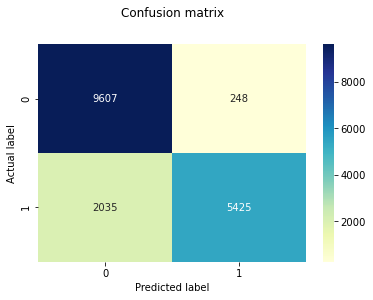

In [63]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
from sklearn import metrics
accuracy_dos = metrics.accuracy_score(Y_DoS_test,Y_DoS_pred2)
print("Accuracy: " ,accuracy_dos)
precision_dos = metrics.precision_score(Y_DoS_test,Y_DoS_pred2)
print("Precision: ",precision_dos)
recall_dos = metrics.recall_score(Y_DoS_test,Y_DoS_pred2)
print("Recall: ",recall_dos)
f1_dos = metrics.f1_score(Y_DoS_test,Y_DoS_pred2)
print("F1-Score: ",f1_dos)

Accuracy:  0.8681490037539705
Precision:  0.9562841530054644
Recall:  0.7272117962466488
F1-Score:  0.8261631005863094


In [65]:
print("\nClassification Report:")
print(classification_report(Y_DoS_test, Y_DoS_pred2))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      9855
           1       0.96      0.73      0.83      7460

    accuracy                           0.87     17315
   macro avg       0.89      0.85      0.86     17315
weighted avg       0.88      0.87      0.86     17315



# Probe

In [66]:
Y_Probe_pred2=clf_rfeProbe.predict(X_Probe_test2)
# accuracy
print("Accuracy:", accuracy_score(Y_Probe_test,Y_Probe_pred2))

Accuracy: 0.8755294884327143


In [67]:
cnf_matrix = confusion_matrix(Y_Probe_test, Y_Probe_pred2)
print("Confusion Matrix: \n")
print(cnf_matrix)

Confusion Matrix: 

[[9216  639]
 [ 889 1532]]


Text(0.5, 15.0, 'Predicted label')

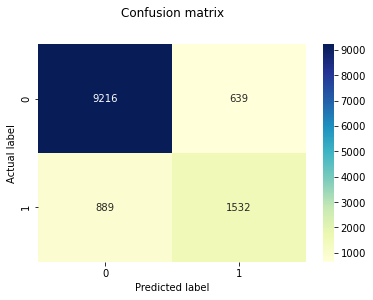

In [68]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [69]:
accuracy_probe = metrics.accuracy_score(Y_Probe_test,Y_Probe_pred2)
print("Accuracy: " ,accuracy_probe)
precision_probe = metrics.precision_score(Y_Probe_test,Y_Probe_pred2,pos_label=2)
print("Precision: ",precision_probe)
recall_probe = metrics.recall_score(Y_Probe_test,Y_Probe_pred2,pos_label=2)
print("Recall: ",recall_probe)
f1_probe = metrics.f1_score(Y_Probe_test,Y_Probe_pred2,pos_label=2)
print("F1-Score: ",f1_probe)

Accuracy:  0.8755294884327143
Precision:  0.7056655918931368
Recall:  0.6327963651383726
F1-Score:  0.667247386759582


In [70]:
print("\nClassification Report:")
print(classification_report(Y_Probe_test, Y_Probe_pred2))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      9855
           2       0.71      0.63      0.67      2421

    accuracy                           0.88     12276
   macro avg       0.81      0.78      0.80     12276
weighted avg       0.87      0.88      0.87     12276



# R2L

In [71]:
Y_R2L_pred2=clf_rfeR2L.predict(X_R2L_test2)
# accuracy
print("Accuracy:", accuracy_score(Y_R2L_test,Y_R2L_pred2))

Accuracy: 0.7971106524845214


In [72]:
cnf_matrix = confusion_matrix(Y_R2L_test, Y_R2L_pred2)
print("Confusion Matrix: \n")
print(cnf_matrix)

Confusion Matrix: 

[[9853    2]
 [2554  189]]


Text(0.5, 15.0, 'Predicted label')

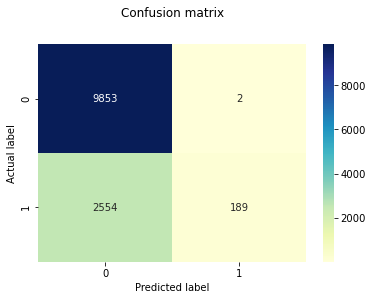

In [73]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [74]:
accuracy_r2l = metrics.accuracy_score(Y_R2L_test,Y_R2L_pred2)
print("Accuracy: " ,accuracy_r2l)
precision_r2l = metrics.precision_score(Y_R2L_test,Y_R2L_pred2,pos_label=3)
print("Precision: ",precision_r2l)
recall_r2l = metrics.recall_score(Y_R2L_test,Y_R2L_pred2,pos_label=3)
print("Recall: ",recall_r2l)
f1_r2l = metrics.f1_score(Y_R2L_test,Y_R2L_pred2,pos_label=3)
print("F1-Score: ",f1_r2l)

Accuracy:  0.7971106524845214
Precision:  0.9895287958115183
Recall:  0.06890266131972293
F1-Score:  0.12883435582822086


In [75]:
print("\nClassification Report:")
print(classification_report(Y_R2L_test, Y_R2L_pred2))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.89      9855
           3       0.99      0.07      0.13      2743

    accuracy                           0.80     12598
   macro avg       0.89      0.53      0.51     12598
weighted avg       0.84      0.80      0.72     12598



# U2R

In [76]:
Y_U2R_pred2=clf_rfeU2R.predict(X_U2R_test2)
# accuracy
print("Accuracy:", accuracy_score(Y_U2R_test,Y_U2R_pred2))

Accuracy: 0.9943548387096774


In [77]:
cnf_matrix = confusion_matrix(Y_U2R_test, Y_U2R_pred2)
print("Confusion Matrix: \n")
print(cnf_matrix)

Confusion Matrix: 

[[9851    4]
 [  52   13]]


Text(0.5, 15.0, 'Predicted label')

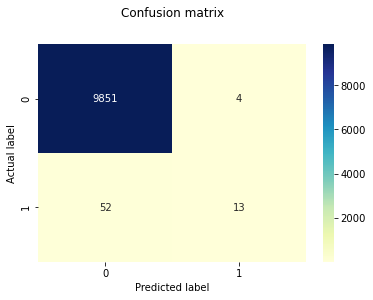

In [78]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [79]:
accuracy_u2r = metrics.accuracy_score(Y_U2R_test,Y_U2R_pred2)
print("Accuracy: " ,accuracy_u2r)
precision_u2r = metrics.precision_score(Y_U2R_test,Y_U2R_pred2,pos_label=4)
print("Precision: ",precision_u2r)
recall_u2r = metrics.recall_score(Y_U2R_test,Y_U2R_pred2,pos_label=4)
print("Recall: ",recall_u2r)
f1_u2r = metrics.f1_score(Y_U2R_test,Y_U2R_pred2,pos_label=4)
print("F1-Score: ",f1_u2r)

Accuracy:  0.9943548387096774
Precision:  0.7647058823529411
Recall:  0.2
F1-Score:  0.3170731707317074


In [80]:
print("\nClassification Report:")
print(classification_report(Y_U2R_test, Y_U2R_pred2))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9855
           4       0.76      0.20      0.32        65

    accuracy                           0.99      9920
   macro avg       0.88      0.60      0.66      9920
weighted avg       0.99      0.99      0.99      9920



## Comparison of the preformance metrics for DOS, PROBE, R2L and U2R

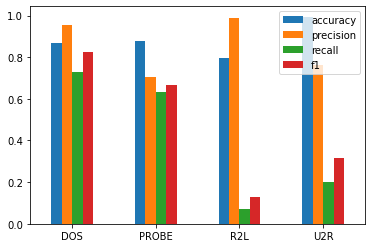

In [81]:
accuracy = [accuracy_dos, accuracy_probe, accuracy_r2l, accuracy_u2r]
precision = [precision_dos, precision_probe, precision_r2l, precision_u2r]
recall = [recall_dos, recall_probe, recall_r2l, recall_u2r]
f1 = [f1_dos, f1_probe, f1_r2l, f1_u2r]
index = ['DOS', 'PROBE', 'R2L','U2R']
data = pd.DataFrame({'accuracy': accuracy,'precision': precision,'recall': recall,'f1': f1}, index=index)
ax = data.plot.bar(rot=0)